# Class 3 Notebook – Machine Learning & Deep Learning Basics

This notebook extends **Class 2 – Machine Learning Basics** by going beyond data preprocessing into **training and evaluating simple models**, and then introducing **deep learning basics**.

We will reuse the same preprocessing ideas from `class-2-machine-learning-basics/` and follow a common step structure:

1. Define the objective
2. Install/import libraries
3. Load or create a dataset
4. Separate features and target
5. Train/test split
6. Train model
7. Make predictions
8. Evaluate model
9. (Optional) Visualize and iterate

Run the first code cell to confirm your environment works.

## Run in the browser (no local setup)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adzuci/ai-fundamentals/blob/main/class-3-machine-learning-deep-learning-basics/01_class_3_linear_regression_basics.ipynb)

> Tip: Make sure you have walked through the notebooks in `class-2-machine-learning-basics/` first, especially `data-preprocessing.ipynb` and `scaling-data.ipynb`.

## Where this fits in supervised learning

In this notebook we focus on **supervised learning**, where we have labeled examples and want to learn a mapping from inputs (features) to outputs (targets).

From the Class 3 slides:

- **Regression algorithms** (predict numbers/values)
  - Linear Regression (this notebook)
  - Polynomial, Ridge, Lasso, Elastic Net (later or advanced material)
  - Tree‑based regressors: Decision Tree Regressor, Random Forest Regressor
  - Support Vector Regression (SVR)
- **Classification algorithms** (predict categories)
  - Logistic Regression
  - K‑Nearest Neighbors (KNN)
  - Decision Tree / Random Forest Classifier
  - Support Vector Machine (SVM)
  - Naive Bayes, Gradient Boosting, XGBoost

In AI Fundamentals we’ll prioritize a **small, practical subset**:

- **Linear Regression** (regression) – implemented end‑to‑end in this notebook.
- **Logistic Regression, Decision Trees, Random Forests, KNN** – introduced in later Class 3+ materials using the **same common step structure**:

1. Objective → what problem we’re solving
2. Install / import libraries
3. Load or create a dataset
4. Separate features and target
5. Train/test split
6. Create and train the model
7. Make predictions
8. Evaluate
9. Predict new data
10. (Optional) Visualize and iterate

You can reuse this pattern for every supervised learning algorithm you learn next.

In [86]:
# Environment sanity check
import platform

print("Python:", platform.python_version())
print("OS:", platform.system(), platform.release())

# Core ML / visualization / model libraries
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score

    print("NumPy:", np.__version__, "| Pandas:", pd.__version__)
except ModuleNotFoundError as exc:
    print("Missing dependency:", exc)
    print("Install with: python -m pip install numpy pandas scikit-learn matplotlib")
    raise

# TODO: In later steps we will add a simple deep learning library import
# (e.g., PyTorch or Keras) and build a tiny feed-forward network on top
# of the same preprocessing pipeline used in Class 2.

Python: 3.10.14
OS: Darwin 25.2.0
NumPy: 2.2.6 | Pandas: 2.3.3


In [87]:
# Create a simple house-prices dataset (size vs price)
X = np.array([300, 700, 950, 1300, 1500, 1900, 2000, 2500, 2800, 3200])
y = np.array([15, 35, 50, 57, 80, 95, 100, 125, 150, 170])

mydata = pd.DataFrame({
    "Size": X,
    "Price": y,
})

print(mydata)

   Size  Price
0   300     15
1   700     35
2   950     50
3  1300     57
4  1500     80
5  1900     95
6  2000    100
7  2500    125
8  2800    150
9  3200    170


In [88]:
print(X)
print(y)


[ 300  700  950 1300 1500 1900 2000 2500 2800 3200]
[ 15  35  50  57  80  95 100 125 150 170]


In [89]:
# 5. 
X = mydata[["Size"]]
y = mydata["Price"]

#6. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Checking values
print(X_train)
print(y_train)




   Size
5  1900
0   300
7  2500
2   950
9  3200
4  1500
3  1300
6  2000
5     95
0     15
7    125
2     50
9    170
4     80
3     57
6    100
Name: Price, dtype: int64


In [90]:
# 7. Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# (Optional) check learned parameters
print("Intercept:", lin_reg.intercept_)
print("Slope:", lin_reg.coef_)

Intercept: -3.348571428571475
Slope: [0.0526585]


In [91]:
# 7. Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# (Optional) check learned parameters
print("Intercept:", lin_reg.intercept_)
print("Slope:", lin_reg.coef_)

Intercept: -3.348571428571475
Slope: [0.0526585]


Slope (m): 0.05265850340136057
Intercept (b): -3.348571428571475
Equation: Price = m * Size + b
Actual: [150, 35]
Predicted: [np.float64(144.09523809523813), np.float64(33.51238095238092)]
MSE: 18.539611791383056
R^2 Score: 0.9943925559799219
Predicted price for size 2200: 112.50013605442179


/Users/adam/.pyenv/versions/3.10.14/envs/ai-fundamentals/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


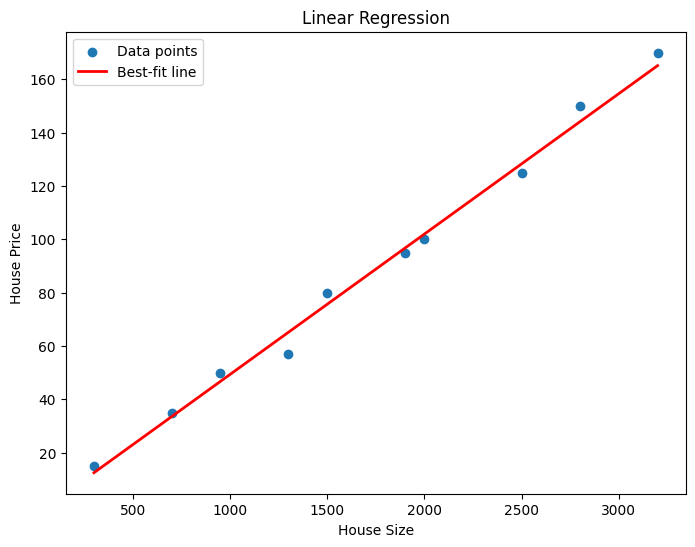

In [92]:
# 8–13. Inspect model, predict, evaluate, and visualize

# 8. View equation values
print("Slope (m):", lin_reg.coef_[0])
print("Intercept (b):", lin_reg.intercept_)
print("Equation: Price = m * Size + b")

# 9. Make predictions on the test set
y_pred = lin_reg.predict(X_test)
print("Actual:", list(y_test))
print("Predicted:", list(y_pred))

# 10. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2 Score:", r2)

# 11. Predict a new house price (e.g., size = 2200)
new_size = np.array([[2200]])
new_price = lin_reg.predict(new_size)
print("Predicted price for size 2200:", new_price[0])

# 12–13. Visualization: data points + best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data points")
plt.plot(X, lin_reg.predict(X), color="red", linewidth=2, label="Best-fit line")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Linear Regression")
plt.legend()
plt.show()

### Key Learnings

- **Linear Regression finds a best-fit line** for the relationship between input (Size) and output (Price).
- **The model learns the relationship from data**, using the training set to estimate slope (`m`) and intercept (`b`).
- **The model can predict unseen values** (e.g., a new house size like 2200) by plugging into the learned equation.

In short: Linear Regression predicts continuous values by fitting a straight line that minimizes error between actual and predicted points.

---

## Exercise: Multiple Linear Regression (more features)

In the example above we used **one feature** (`Size`) and **one output** (`Price`). This is **simple linear regression**.

In **multiple linear regression**, you use **several input features** to predict a single output.

Example:
- Inputs: `Area`, `Bedrooms`, `Age` (years)
- Output: `Price`

### Your task

Using the same pattern as the single-feature example:

1. **Create a small DataFrame** with columns like `Area`, `Bedrooms`, `Age`, and `Price` (8–12 rows is plenty).
2. **Separate features and target**:
   - `X_multi = mydata_multi[["Area", "Bedrooms", "Age"]]`
   - `y_multi = mydata_multi["Price"]`
3. **Split into train/test** with `train_test_split`.
4. **Train a `LinearRegression` model** on the training data.
5. **Inspect the coefficients** and intercept and write down the equation:
   - `Price ≈ b + m_area * Area + m_bed * Bedrooms + m_age * Age`
6. **Evaluate** your model with MSE and R².
7. **Predict the price of a new house** given `(Area, Bedrooms, Age)`.

Try to write the code yourself first. If you get stuck, you can scroll back to the single-feature example and mirror the steps, just changing the feature columns you use.

In [93]:
# Separate features and target for the multiple linear regression exercise
X_multi = mydata_multi[["Area", "Bedrooms", "Age"]]
y_multi = mydata_multi["Price"]

X_multi, y_multi

(   Area  Bedrooms  Age
 0   800         2   20
 1  1000         2   15
 2  1200         3   10
 3  1500         3    8
 4  1800         3    5
 5  2000         4    4
 6  2200         4    3
 7  2500         4    2,
 0    120
 1    150
 2    170
 3    200
 4    230
 5    260
 6    280
 7    310
 Name: Price, dtype: int64)

In [94]:
data = {
    "Area":     [800, 1000, 1200, 1500, 1800, 2000, 2200, 2500],
    "Bedrooms": [2,   2,    3,    3,    3,    4,    4,    4],
    "Age":      [20,  15,   10,   8,    5,    4,    3,    2],
    "Price":    [120, 150,  170,  200,  230,  260,  280,  310],
}

mydata_multi = pd.DataFrame(data)
print(mydata_multi)

   Area  Bedrooms  Age  Price
0   800         2   20    120
1  1000         2   15    150
2  1200         3   10    170
3  1500         3    8    200
4  1800         3    5    230
5  2000         4    4    260
6  2200         4    3    280
7  2500         4    2    310


In [95]:
X_multi = mydata_multi[["Area", "Bedrooms", "Age"]]  # features
y_multi = mydata_multi["Price"]                      # target

In [96]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi,
    y_multi,
    test_size=0.25,   # 25% test, 75% train
    random_state=42   # keep results reproducible
)

X_train_multi, y_train_multi

(   Area  Bedrooms  Age
 0   800         2   20
 7  2500         4    2
 2  1200         3   10
 4  1800         3    5
 3  1500         3    8
 6  2200         4    3,
 0    120
 7    310
 2    170
 4    230
 3    200
 6    280
 Name: Price, dtype: int64)

In [97]:
# Train multiple linear regression model
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, y_train_multi)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
from sklearn.metrics import mean_squared_error, r2_score

# Bonus: Inspect the coefficients and intercept
print("Intercept (b):", multi_reg.intercept_)
print("Coefficients (m for each feature):", multi_reg.coef_)
print("Feature order:", X_multi.columns.tolist())

# Predictions on the test set
y_pred_multi = multi_reg.predict(X_test_multi)

print("Actual:", list(y_test_multi))
print("Predicted:", list(y_pred_multi))

mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("MSE (multi):", mse_multi)
print("R^2 (multi):", r2_multi)

Intercept (b): 20.000000000000142
Coefficients (m for each feature): [1.00000000e-01 1.00000000e+01 1.48438209e-15]
Feature order: ['Area', 'Bedrooms', 'Age']
Actual: [150, 260]
Predicted: [np.float64(140.00000000000009), np.float64(260.0)]
MSE (multi): 49.99999999999915
R^2 (multi): 0.9834710743801656


In [101]:
# Predict a new house using a DataFrame with feature names
new_house_df = pd.DataFrame(
    [[2100, 3, 4]],          # Area, Bedrooms, Age
    columns=["Area", "Bedrooms", "Age"]
)

pred_price_multi = multi_reg.predict(new_house_df)
print("Predicted price for new house:", pred_price_multi[0])

Predicted price for new house: 260.0


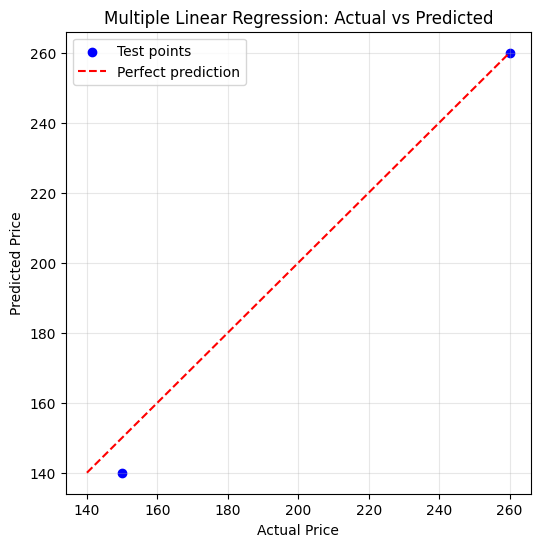

In [102]:
# Visualize how close predictions are to actual test prices
plt.figure(figsize=(6, 6))

# Scatter: each point is (actual_price, predicted_price)
plt.scatter(y_test_multi, y_pred_multi, color="blue", label="Test points")

# Perfect-prediction line (y = x)
min_price = min(y_test_multi.min(), y_pred_multi.min())
max_price = max(y_test_multi.max(), y_pred_multi.max())
plt.plot([min_price, max_price], [min_price, max_price],
         color="red", linestyle="--", label="Perfect prediction")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(alpha=0.3)
plt.show()